# Example Jupyter Notebook

Here I present an exemple of how to use DustyPY. In this tutorial we will use Betelgeuse as an exemple.

### Set up a Model

The first thing to do is to create your model. In the case of Betelgeuse, we have a single star with a Temperature around 3500 K:


In [1]:
from DustyPY.stars import Star

S = Star(Name='E1',Temperature=3500,Luminosity=1)

Note: For a single star, the Luminosity must always be 1 as it is the contribution of this star to the total luminosity of the model.

Then we need to create the dust around. We refer to this paper for the dust composition and grain size distribution [Cannon et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...675A..46C)

In [2]:
from DustyPY.stars import Dust

Composition = {'Al2O3-comp':0.2,'MgFeSiO4':0.16,'Ca2Al2SiO7':0.64}
DustSize = {'amin' : 0.01, 'amax': 1}  #Size in microns
tau = 1 #Optical depth of the dust shell at 0.55 microns to be fitted

dust = Dust(Composition=Composition, DustSize=DustSize, tau=tau)

With this we can create our model with a distance of 197 pc [Graham et al. 2008](https://iopscience.iop.org/article/10.1088/0004-6256/135/4/1430):

In [3]:
from DustyPY.stars import Model

model = Model(Name='Betelgeuse', NbStar=1, Stars=[S], Dust=dust, distance = 197.0) 

Then we need to create the dusty object and give him the dusty PATH on your machine and the model:

In [4]:
from DustyPY.dusty import Dusty

Path = '/Users/gabriel/Documents/Stage/code/dustyV2/' #Replace with the path to the dusty directory

dusty = Dusty(PATH=Path, Model=model,Lestimation=1.8e5)

### Add the data

Once the dusty file is set with the model, we can import the data. To do this you can either import your own data like follow:

In [13]:
from DustyPY.Data import Data

data = Data()

d = data.ImportData('Path_to_Data') #Replace with the path to the data

data.set_xdata(xdata) #Replace with the x data, Wavelength in microns
data.set_ydata(ydata) #Replace with the y data, Flux in W/m2 or Jy
data.set_yerr(yerr)

FileNotFoundError: [Errno 2] No such file or directory: 'Path_to_Data'

Or you can use the built in querry to reitrive the photometry from Vizier:

In [5]:
from DustyPY.Data import Data
Dat = Data()

table = Dat.QuerryVizierData(radius = 5, target='Betelgeuse')
Dat.SetVizierData(table)

If needed, you can restrict the data to a subset using the method RestrictData():

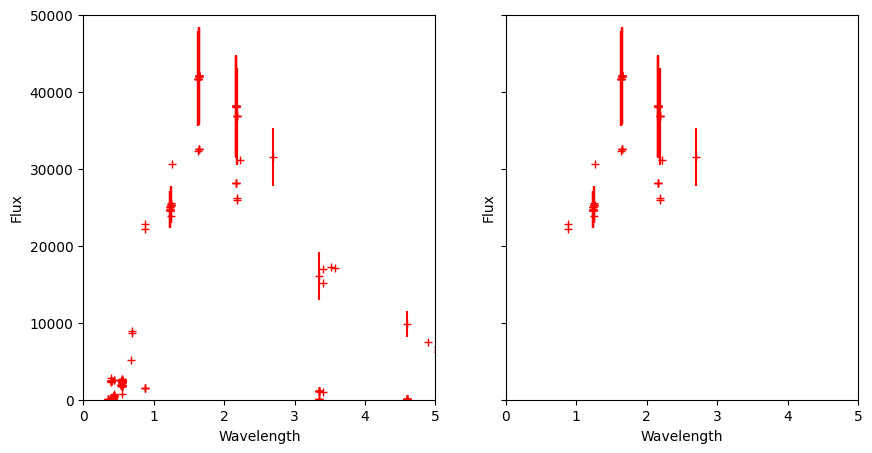

In [6]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.ScatterData(xlim=(0,5),ylim=(0,5e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.RestrictData(['ydata > 20000'])
Dat.ScatterData(xlim=(0,5),ylim=(0,5e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


You can also unred the data using the Fitzpatrick parameterization ([Fitzpatrick et al. 1999](https://ui.adsabs.harvard.edu/abs/1999PASP..111...63F))

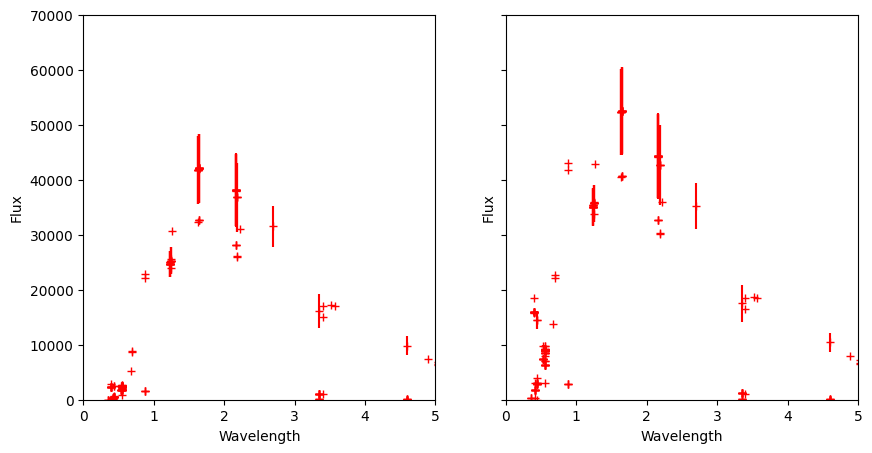

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.SetVizierData(table)
Dat.ScatterData(xlim=(0,5),ylim=(0,7e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.UnredData(EBV=0.470)
Dat.ScatterData(xlim=(0,5),ylim=(0,7e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


### Lunch Model

Once the model is setup, you can lunch dusty and extract the results.

here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


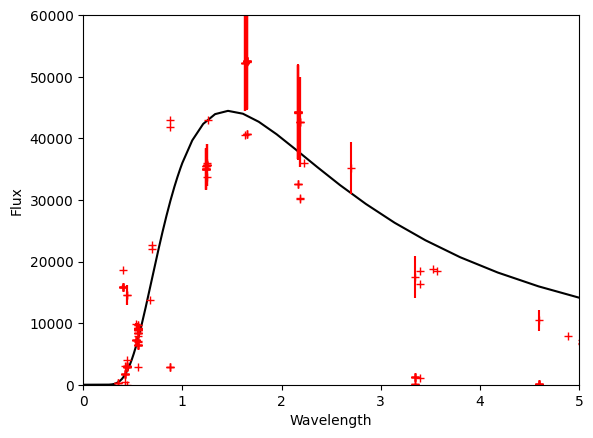

In [8]:
#Change the parameter file and lunch dusty
dusty.ChangeParameter()
dusty.LunchDusty()


#Retrieve the results SED and plot it
dusty.MakeSED(distance=dusty.get_Model().get_Distance())

fig,ax = plt.subplots()
dusty.PlotSED(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'color':'k'})
Dat.ScatterData(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'fmt':'+', 'color':'r'})

### Fit Model

Finaly, DustyPY offer a convenient way to fit a model to the data using the librarie [pymcmcstat](https://github.com/prmiles/pymcmcstat.git).

In [12]:
#Querry the data
table = Dat.QuerryVizierData(radius = 5, target='Betelgeuse')
Dat.SetVizierData(table)

#To fit data the error must be different from 0 so we restrict the data
Dat.RestrictData(['yerr != 0.'])

In [10]:
from DustyPY.DustyFit import DustyFit

#Initialize the DustyFit object
fit = DustyFit(dusty, Data=Dat)

#Initialize the Parameter to Fit
#For the Temperature/Luminosity of the stars, always put the number of the star, 
# in the same order as the listed stars, after Temp ex: Temp1, Lum1, Temp2, Lum2,...)
Param = {'Temp1':{'theta0':3500,'minimum':2000,'maximum':4000}, 
         'Opacity':{'theta0':1,'minimum':0.1,'maximum':4},
         'Lest':{'theta0':1,'minimum':0,'maximum':10}, #Mandatory, fit the Lestimation (Luminosity = Lest*Lestimation)
    }

#Initialize the parameter of the MCMC
ParamFit = {
                        'nsimu': 100,         #Number of iteration (larger is better but slow due to the dusty runtime)   
                        'updatesigma': True,  #Update the sigma of the likelihood function
                        'method': 'dram',     #Sampling method
                        'adaptint': 100,      #Number of interates between adaptation.
                        'verbosity': 0,       #0=No output, 1=Output
                        'waitbar': True,      #Display a waitbar
                    }

#Set the parameters
fit.set_Param(Param)
fit.set_ParamFit(ParamFit)

#Run the MCMC and get results
fit.LunchFit()
fit.get_Fit().PrintResults()

here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-                 4%                  ] 4 of 100 complete in 2.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-                 5%                  ] 5 of 100 complete in 4.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--                6%                  ] 6 of 100 complete in 6.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--                7%                  ] 7 of 100 complete in 8.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---               8%                  ] 8 of 100 complete in 9.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---               9%                  ] 9 of 100 complete in 11.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---              10%                  ] 10 of 100 complete in 12.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [----             11%                  ] 11 of 100 complete in 14.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [----             12%                  ] 12 of 100 complete in 16.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [----             13%                  ] 13 of 100 complete in 18.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----            14%                  ] 14 of 100 complete in 20.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----            15%                  ] 15 of 100 complete in 22.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [------           16%                  ] 16 of 100 complete in 23.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [------           17%                  ] 17 of 100 complete in 24.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [------           18%                  ] 18 of 100 complete in 25.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-------          19%                  ] 19 of 100 complete in 27.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-------          20%                  ] 20 of 100 complete in 28.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-------          21%                  ] 21 of 100 complete in 30.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--------         22%                  ] 22 of 100 complete in 32.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--------         23%                  ] 23 of 100 complete in 35.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------        24%                  ] 24 of 100 complete in 36.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------        25%                  ] 25 of 100 complete in 38.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------        26%                  ] 26 of 100 complete in 39.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [----------       27%                  ] 27 of 100 complete in 41.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [----------       28%                  ] 28 of 100 complete in 42.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------      29%                  ] 29 of 100 complete in 43.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------      30%                  ] 30 of 100 complete in 45.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------      31%                  ] 31 of 100 complete in 48.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [------------     32%                  ] 32 of 100 complete in 49.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [------------     33%                  ] 33 of 100 complete in 51.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [------------     34%                  ] 34 of 100 complete in 52.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-------------    35%                  ] 35 of 100 complete in 55.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-------------    36%                  ] 36 of 100 complete in 57.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--------------   37%                  ] 37 of 100 complete in 59.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--------------   38%                  ] 38 of 100 complete in 62.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [--------------   39%                  ] 39 of 100 complete in 64.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------------  40%                  ] 40 of 100 complete in 66.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------------  41%                  ] 41 of 100 complete in 69.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------------  42%                  ] 42 of 100 complete in 71.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------------- 43%                  ] 43 of 100 complete in 73.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [---------------- 44%                  ] 44 of 100 complete in 76.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------45%                  ] 45 of 100 complete in 78.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------46%                  ] 46 of 100 complete in 79.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------47%                  ] 47 of 100 complete in 80.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------48%                  ] 48 of 100 complete in 82.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------49%                  ] 49 of 100 complete in 83.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------50%                  ] 50 of 100 complete in 85.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------51%                  ] 51 of 100 complete in 86.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------52%                  ] 52 of 100 complete in 87.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------53%                  ] 53 of 100 complete in 88.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------54%                  ] 54 of 100 complete in 90.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------55%                  ] 55 of 100 complete in 91.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------56%-                 ] 56 of 100 complete in 92.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------57%-                 ] 57 of 100 complete in 93.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------58%--                ] 58 of 100 complete in 94.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------59%--                ] 59 of 100 complete in 96.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------60%--                ] 60 of 100 complete in 99.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------61%---               ] 61 of 100 complete in 101.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------62%---               ] 62 of 100 complete in 103.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------63%---               ] 63 of 100 complete in 106.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------64%----              ] 64 of 100 complete in 108.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------65%----              ] 65 of 100 complete in 110.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------66%-----             ] 66 of 100 complete in 111.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------67%-----             ] 67 of 100 complete in 112.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------68%-----             ] 68 of 100 complete in 114.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------69%------            ] 69 of 100 complete in 115.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------70%------            ] 70 of 100 complete in 117.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------71%------            ] 71 of 100 complete in 119.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------72%-------           ] 72 of 100 complete in 120.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------73%-------           ] 73 of 100 complete in 123.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------74%--------          ] 74 of 100 complete in 125.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------75%--------          ] 75 of 100 complete in 126.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------76%--------          ] 76 of 100 complete in 129.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------77%---------         ] 77 of 100 complete in 131.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------78%---------         ] 78 of 100 complete in 132.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------79%----------        ] 79 of 100 complete in 133.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------80%----------        ] 80 of 100 complete in 134.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------81%----------        ] 81 of 100 complete in 135.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------82%-----------       ] 82 of 100 complete in 138.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------83%-----------       ] 83 of 100 complete in 140.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------84%-----------       ] 84 of 100 complete in 141.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------85%------------      ] 85 of 100 complete in 142.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------86%------------      ] 86 of 100 complete in 144.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------87%-------------     ] 87 of 100 complete in 146.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------88%-------------     ] 88 of 100 complete in 147.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------89%-------------     ] 89 of 100 complete in 148.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------90%--------------    ] 90 of 100 complete in 149.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------91%--------------    ] 91 of 100 complete in 150.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------92%--------------    ] 92 of 100 complete in 152.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------93%---------------   ] 93 of 100 complete in 153.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------94%---------------   ] 94 of 100 complete in 155.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------95%----------------  ] 95 of 100 complete in 156.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------96%----------------  ] 96 of 100 complete in 159.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------97%----------------  ] 97 of 100 complete in 161.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------98%----------------- ] 98 of 100 complete in 162.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------99%----------------- ] 99 of 100 complete in 164.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------100%-----------------] 100 of 100 complete in 167.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here
 [-----------------101%-----------------] 101 of 100 complete in 168.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


here


------------------------------
      name:      mean       std    MC_err       tau    geweke
     Temp1:   3627.35    320.28    134.06      4.73      0.89
   Opacity:      0.81      0.14      0.07      5.22      0.63
      Lest:      0.78      0.02  5.42e-03      3.58      0.97
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 48.00%
Stage 2: 38.00%
Net    : 86.00% -> 86/100
---------------
Chain provided:
Net    : 84.00% -> 42/50
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


{'Temp1': 3972.6672538365883, 'Opacity': 0.5431348954982406, 'Lest': 0.7643546848228109}
here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


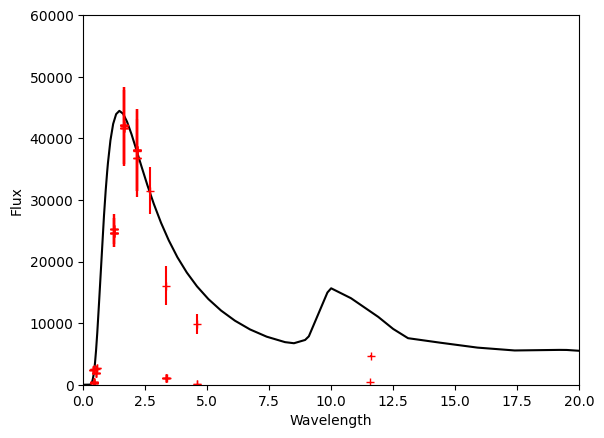

In [26]:
fig,ax = plt.subplots()

fit.PlotResults(xlim=(0,20),ylim=(0,6e4), ax=ax, kwargs_fit={'color':'k'}, kwargs_data={'fmt':'+', 'color':'r'})